## Task: SEIRS Epidemic Spread (A More Sophisticated Model)

The SEIRS model describes epidemic spread characteristics where there is a latent (E) period between infection and becoming infectious. In addition to the SIR model, it includes mortality and the fact that those who have recovered become susceptible to infection again after a certain period of time.

The differential equation system of the SEIRS model is:
\begin{align}
\dot{S} &= \underbrace{\mu N}_{birth}-\underbrace{\frac{\beta}{N}IS}_{infection} + \underbrace{\omega R}_{loss\, of\, immunity}
-\underbrace{\mu S}_{natural\, death} \\
\dot{E} &= \underbrace{\frac{\beta}{N}IS}_{infection}-\underbrace{\sigma E}_{latent}-\underbrace{\mu E}_{natural\, death} \\
\dot{I} &= \underbrace{\sigma E}_{latent} - \underbrace{\gamma I}_{recovery}-\underbrace{(\mu + \alpha) I}_{mortality} \\
\dot{R} &= \underbrace{\gamma I}_{recovery} - \underbrace{\omega R}_{loss\, of\, immunity} - \underbrace{\mu R}_{natural\, death} \\
N &= S+E+I+R
\end{align}

The model is written for a population in equilibrium, where individuals are born and die at the same rate $\mu>0$. The epidemic imposes an additional mortality rate $\alpha>0$ on those infected.

**Let's create an SEIR model simulation (it doesn't need to be interactive).**

Suggested parameter values: $1/\gamma = 14\,days$, $1/\sigma = 7\,days$, $1/\omega = 1\,year$, $1/\mu = 76\,years$, $\beta = 0.21\,day^{-1}$, $1/\alpha= 7\,days$.

The initial values should be: $S(0)=10^6$, $E(0)=10.0$, $I(0)=R(0)=0.0$.


<IPython.core.display.Javascript object>


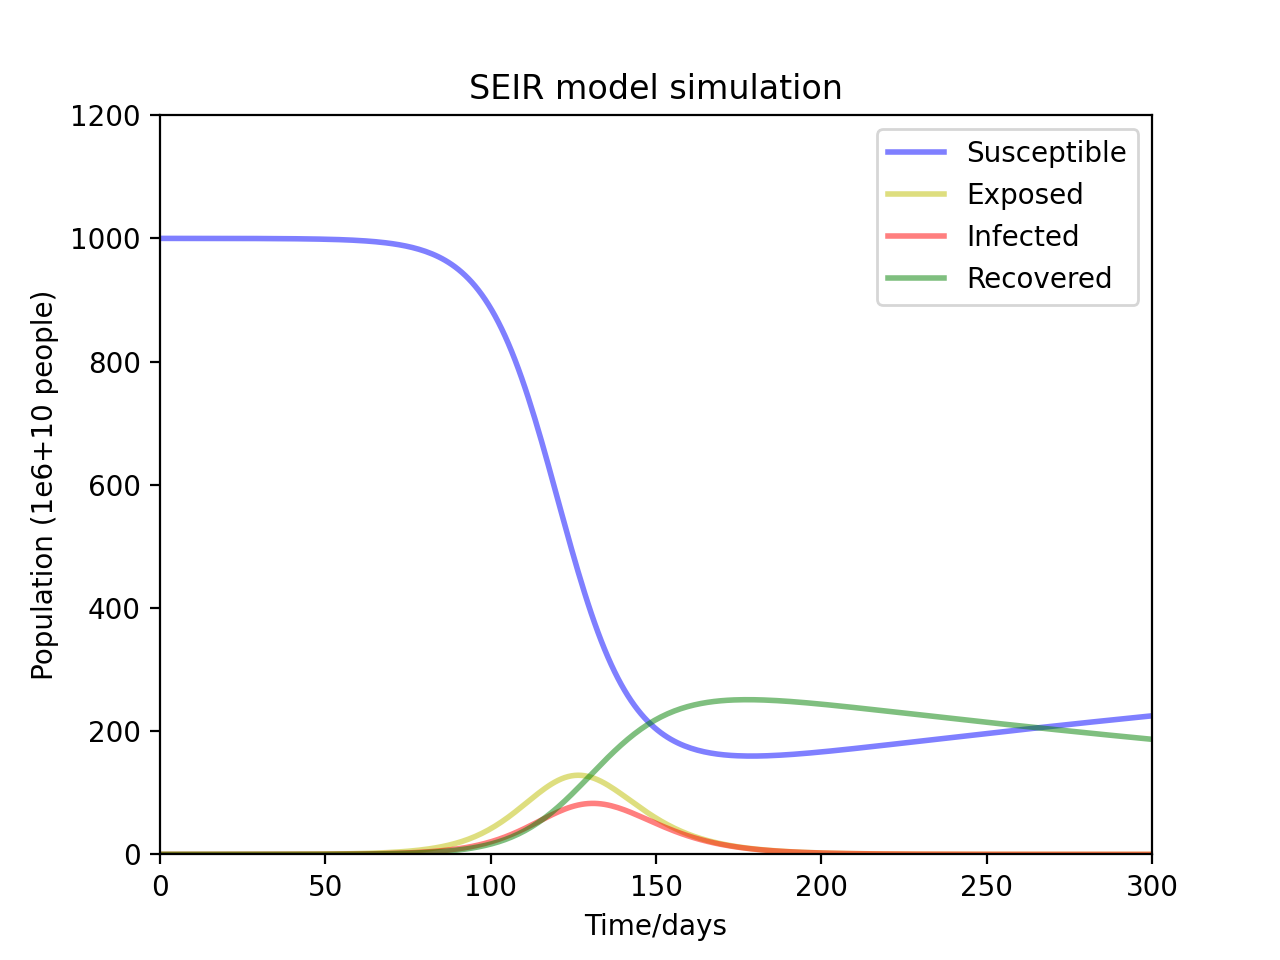

interactive(children=(FloatSlider(value=0.5, description='beta', max=0.5, min=0.1, step=0.05), FloatSlider(val…

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np 
from scipy.integrate import odeint


# Right-hand side of the differential equation
def SEIR_LHS(y, t, N, beta, sigma, gamma, omega, mu, alpha):
    #beta=infection rate, gamma=recovery rate, mu=die&born rate, alpha= mortality rate
    
    S, E, I, R = y #susceptible (S), latent(E), infectious (I), and recovered (R) 
    dSdt = mu * N - (beta * S * I) / N + (omega*R) - (mu * S)
    dEdt = (beta * S * I) / N - (sigma * E) - (mu * E)
    dIdt = (sigma * E) - (gamma * I) - ((mu + alpha) * I)
    dRdt = (gamma * I) - (omega * R) - (mu * R)
    return dSdt, dEdt, dIdt, dRdt


# Visualization
fig = plt.figure()
ax = fig.add_subplot(111, axisbelow=True)
ax.set_xlabel('Time/days')
ax.set_ylabel('Population (1e6+10 people)')
ax.set_xlim(0, 300)
ax.set_ylim(0, 1200)

lS, = ax.plot([], [], 'b', alpha=0.5, lw=2, label='Susceptible')  #alpha=transparency, lw=linewidth
lE, = ax.plot([], [], 'y', alpha=0.5, lw=2, label='Exposed')
lI, = ax.plot([], [], 'r', alpha=0.5, lw=2, label='Infected')
lR, = ax.plot([], [], 'g', alpha=0.5, lw=2, label='Recovered')

ax.legend()


# Initial values
N = 1e6+10.0 #population in the city
#beta = 100/21
#sigma = 1/7
#gamma = 1/14
#omega = 1/365
#mu = 1/(76*365)
#alpha = 1/7

#10 exposed people come to the city
I0, E0, R0 = 0.0, 10.0, 0.0

# So everyone else is susceptible
S0 = N - I0 - E0 - R0
y0 = S0, E0, I0, R0
t = np.linspace(0, 300, 300)# We are interested in the developments over the next 10 months, so we take 300 days


@interact(beta=(0.1,0.5,0.05),gamma=(0.02,0.1,0.05), mu=(0.000001,0.0004,0.000005), omega=(0.001,0.003,0.0005), sigma=(0.1,0.3,0.05), alpha=(0.1,0.3,0.05))
def simulation(beta=100/21, gamma=1/14, mu=1/(76*365), omega=1/365, sigma=1/7, alpha=1/7):
    """
    Interactive simulation of the SIR model
    """

    ret = odeint(SEIR_LHS, y0, t, args=(N, beta, sigma, gamma, omega, mu, alpha))
    S, E, I, R = ret.T
    #The odeint function from the scipy.integrate module is used to numerically solve the differential equations 
    # and obtain the values of S, E, I, and R over time.

    lS.set_data(t, S/1000)
    lE.set_data(t, E/1000)
    lI.set_data(t, I/1000)
    lR.set_data(t, R/1000)
    # The division by 1000 is used to scale the values to represent the absolute number
    # of individuals in the population
    ax.set_title(f'SEIR model simulation')